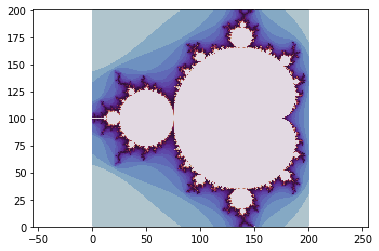

In [35]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


def escape_proto(c: complex,
                 r: float = 2,
                 max_it=200) -> int:
    z = 0.0 + 0.0j
    i = 0
    for i in range(max_it):
        z = z ** 2 + c
        if abs(z) > r:
            return i

    return max_it


def mandelbrot_proto(minx: float,
                     maxx: float,
                     miny: float,
                     maxy: float,
                     nx: int = 200,
                     ny: int = 200,
                     r: float = 2,
                     max_it: int = 200) -> list[list[int]]:
    dx = (maxx - minx) / nx
    dy = (maxy - miny) / ny

    # result_2 = [[minx + x * dx, miny + y * dy] for y in range(ny + 1) for x in range(nx + 1)]
    # print(result_2)
    result = []
    for iy in range(ny + 1):
        result.append([])
        for ix in range(nx + 1):
            x = minx + ix * dx
            y = miny + iy * dy
            c = x + y * 1j
            it = escape_proto(c, r=r, max_it=max_it)
            result[-1].append(it)

    return result


arr_proto = np.array(mandelbrot_proto(
    -1.5, 0.5,
    -1.0, 1.0
))


plt.figure()
plt.pcolormesh(np.log(arr_proto + 1), cmap='twilight')
plt.axis('equal')
plt.show()

np.savetxt('result.txt', arr_proto)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


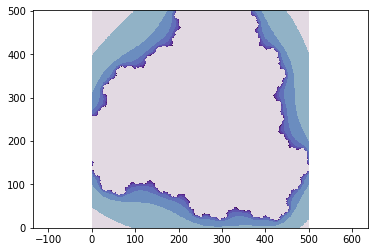

In [53]:
# Вариант 5. Множество Жюлиа. Функция: z_(n+1) = z^3_n + c.
# Прежде всего, необходимо понять, что является множеством Жюлиа - множество комлексных точек, для которых итерирование
# функции приведет к уходу на бесконечность.

import numpy as np
# from numba import prange, njit

import matplotlib
# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt


class JuliaSet:
    def __init__(self,
                 c: complex,
                 p1: tuple = (-1, -1),
                 p2: tuple = (1, 1),
                 nx: int = 500,
                 ny: int = 500,
                 r: float = 2,
                 max_it: int = 200,
                 ):
        self.func = lambda z: z ** 3 + c
        self.minx = p1[0]
        self.miny = p1[1]
        self.maxx = p2[0]
        self.maxy = p2[1]
        self.nx = nx
        self.ny = ny
        self.r = r
        self.max_it = max_it

    def check_point(self, z: complex):
        res = self.func(z)
        for i in range(self.max_it):
            if abs(res) > self.r:
                return i
            res = self.func(res)

        return self.max_it

    def set_calculate(self):
        dx = (self.maxx - self.minx) / self.nx
        dy = (self.maxy - self.miny) / self.ny

        result = []
        for iy in range(self.ny + 1):
            result.append([])
            for ix in range(self.nx + 1):
                x = self.minx + ix * dx
                y = self.miny + iy * dy
                it = self.check_point(complex(x, y))
                result[-1].append(it)

        return result


pi = JuliaSet(complex(0.3341, 0.3966))
res = np.array(pi.set_calculate())
print(res)
plt.figure()
plt.pcolormesh(np.log(res + 1), cmap='twilight')
plt.axis('equal')
plt.show()